In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind

In [19]:
import sys
sys.path.append('../src')
from functions import *

# Loading the Data

In [20]:
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
pd.set_option('display.max_columns', None)

## 1. Demographic Analysis


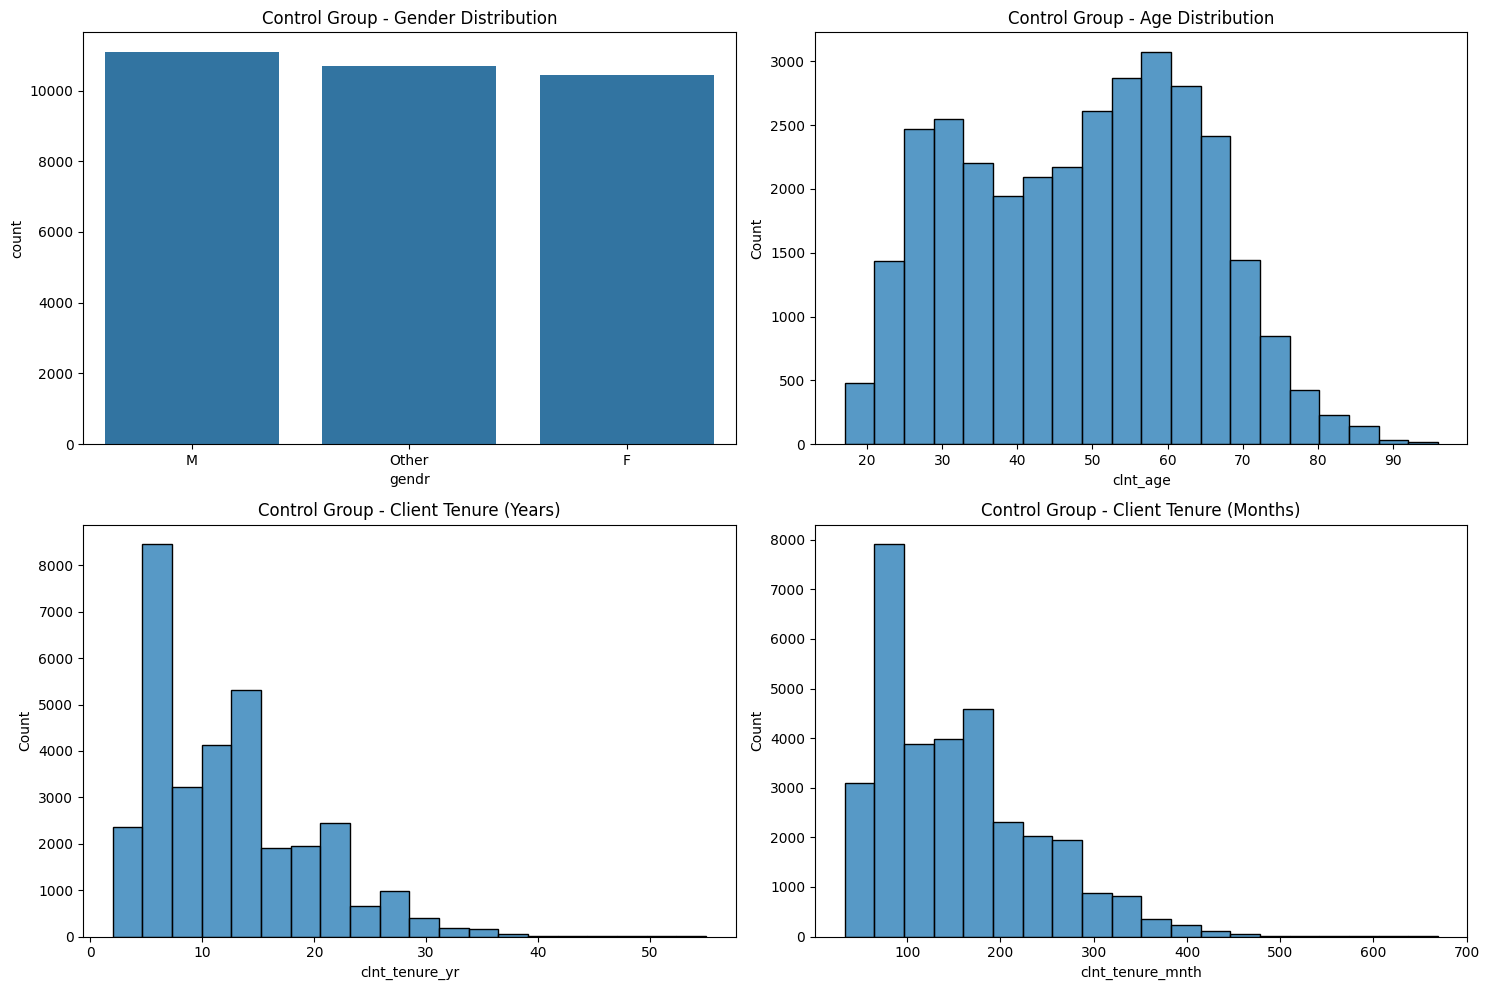

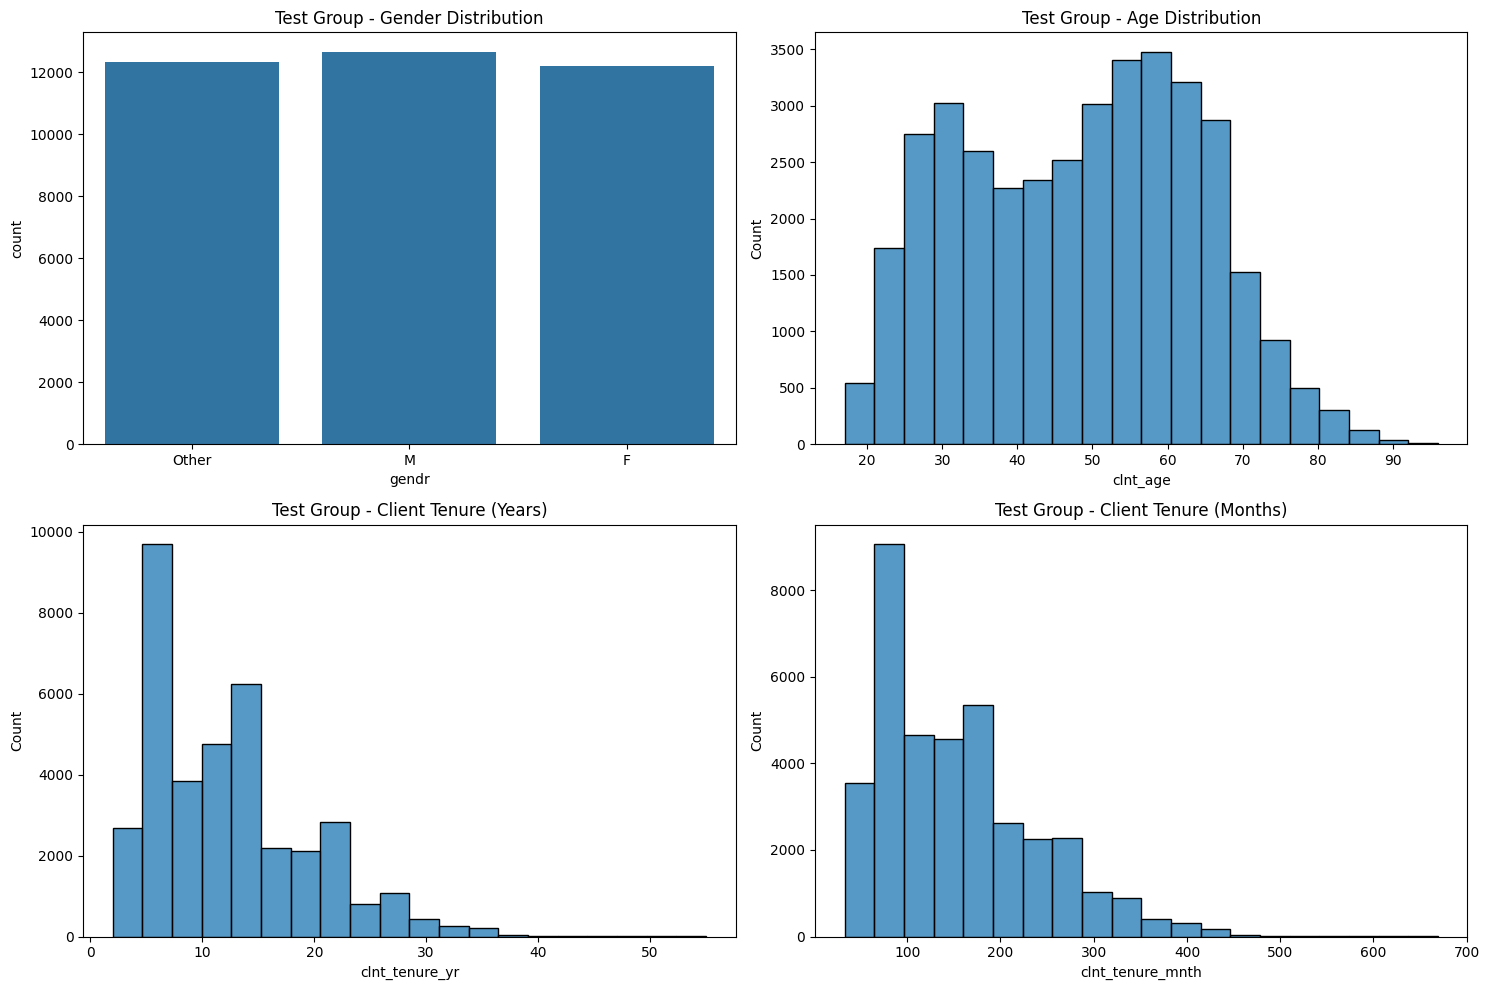

In [21]:

# Univariate Analysis - Demographics
def demographic_analysis(df, title):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='gendr')
    plt.title(f'{title} - Gender Distribution')

    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='clnt_age', bins=20)
    plt.title(f'{title} - Age Distribution')

    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x='clnt_tenure_yr', bins=20)
    plt.title(f'{title} - Client Tenure (Years)')

    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='clnt_tenure_mnth', bins=20)
    plt.title(f'{title} - Client Tenure (Months)')

    plt.tight_layout()
    plt.show()

demographic_analysis(df_control_final, 'Control Group')
demographic_analysis(df_test_final, 'Test Group')


### Demographic side by side comparisson 

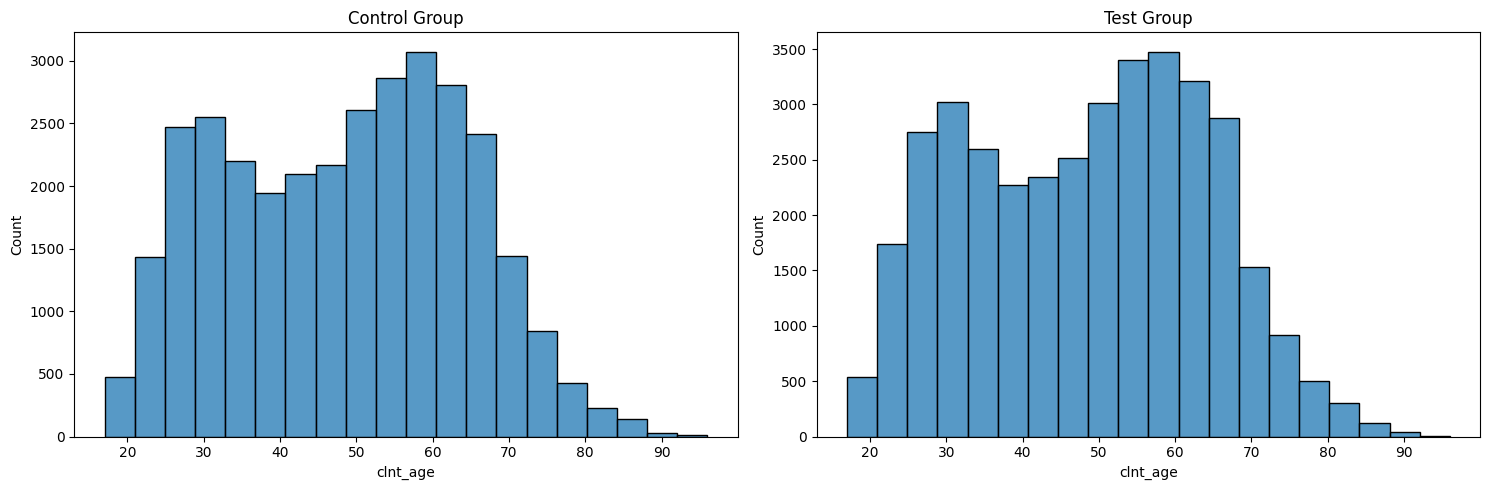

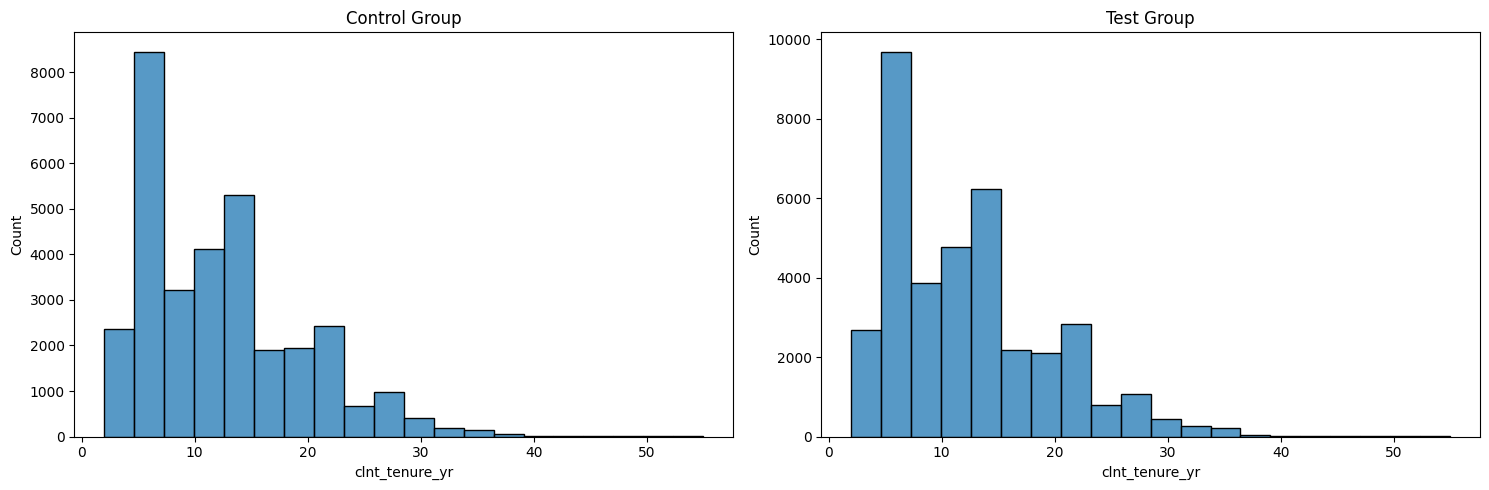

In [5]:
def visualize_side_by_side(df1, df2, title1, title2, col):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df1, x=col, bins=20)
    plt.title(title1)

    plt.subplot(1, 2, 2)
    sns.histplot(data=df2, x=col, bins=20)
    plt.title(title2)

    plt.tight_layout()
    plt.show()

visualize_side_by_side(df_control_final, df_test_final, 'Control Group', 'Test Group', 'clnt_age')
visualize_side_by_side(df_control_final, df_test_final, 'Control Group', 'Test Group', 'clnt_tenure_yr')

## 2. Client Behaviour Analysis


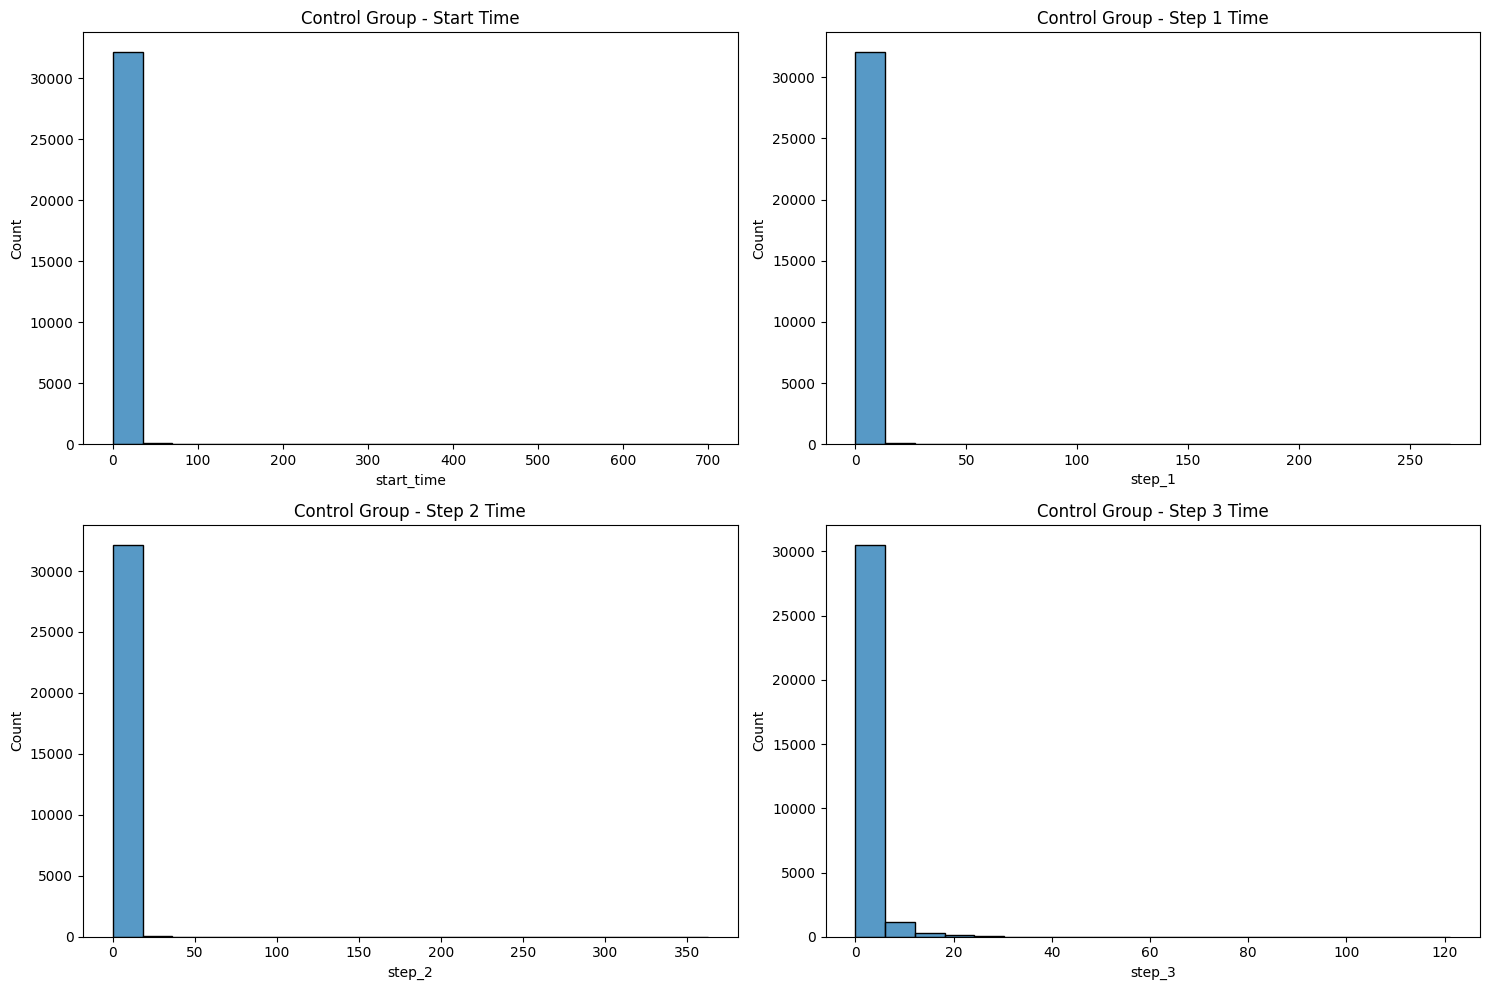

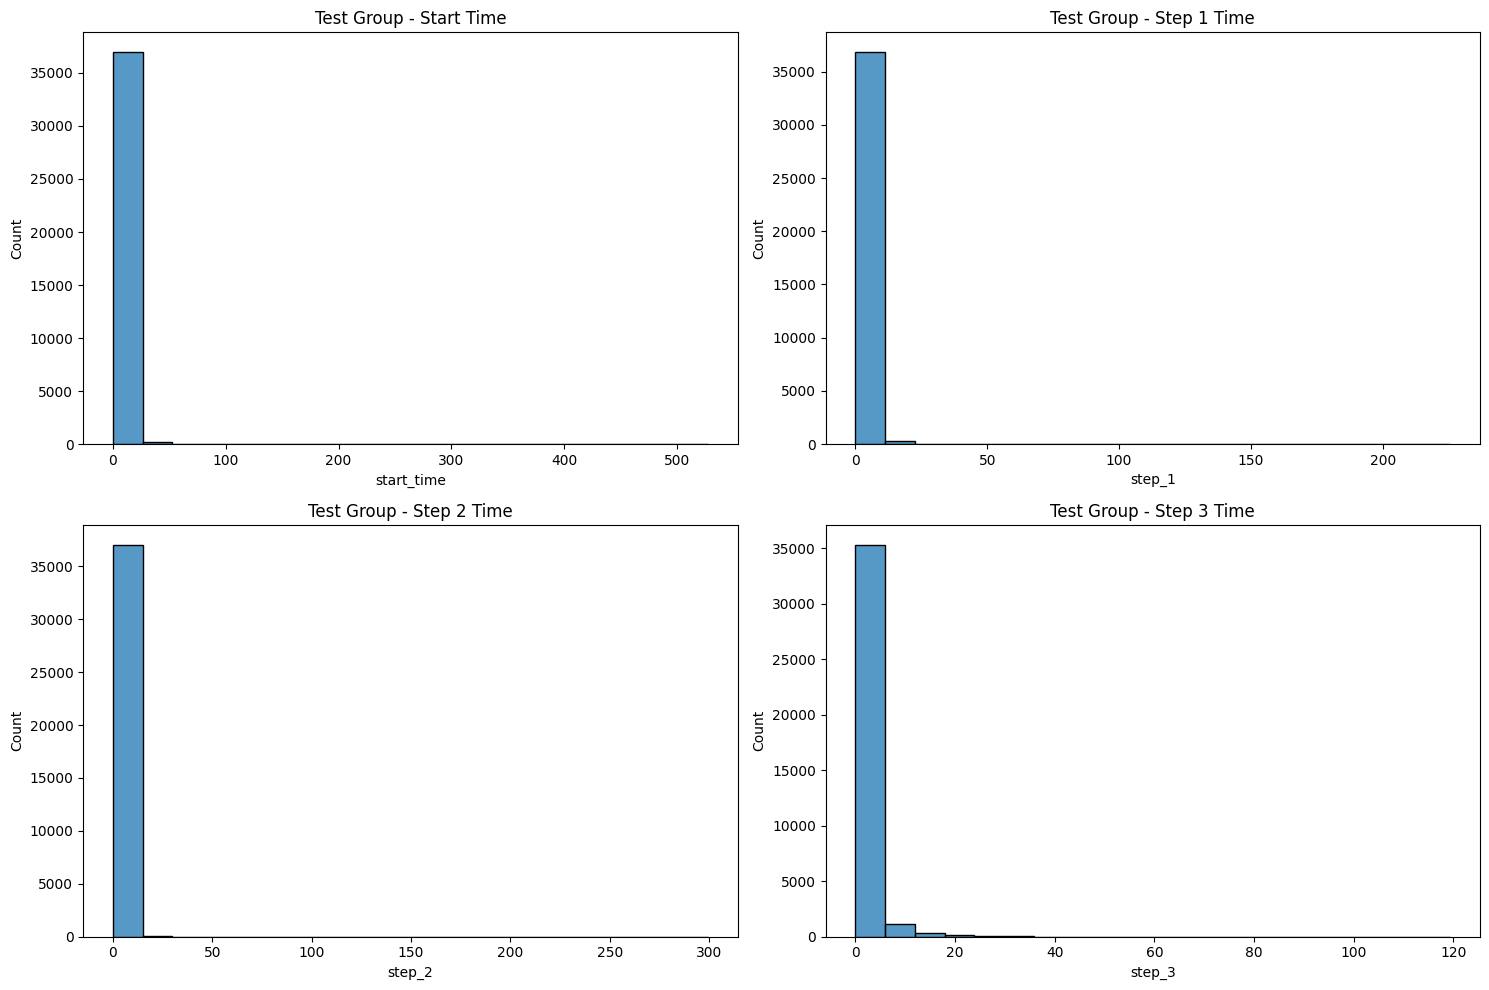

In [6]:
# Bivariate Analysis - Steps and Time
def behavior_analysis(df, title):
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='start_time', bins=20)
    plt.title(f'{title} - Start Time')

    plt.subplot(2, 2, 2)
    sns.histplot(data=df, x='step_1', bins=20)
    plt.title(f'{title} - Step 1 Time')

    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x='step_2', bins=20)
    plt.title(f'{title} - Step 2 Time')

    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='step_3', bins=20)
    plt.title(f'{title} - Step 3 Time')

    plt.tight_layout()
    plt.show()

behavior_analysis(df_control_final, 'Control Group')
behavior_analysis(df_test_final, 'Test Group')


## 3. Key Performance Indicators (KPIs)


Control Group KPIs: {'completion_rate': 0.47655448867344086, 'avg_start_time': 1.2343958430277648, 'avg_step_1_time': 0.679452458507833, 'avg_step_2_time': 1.1562566568429762, 'avg_step_3_time': 1.4371966289230131, 'error_rate': 0.7414312793263106}
Test Group KPIs: {'completion_rate': 0.5774203976078875, 'avg_start_time': 1.2760107555794566, 'avg_step_1_time': 0.9656211347136326, 'avg_step_2_time': 1.1773124495832212, 'avg_step_3_time': 1.393163484807744, 'error_rate': 0.7268196756640267}


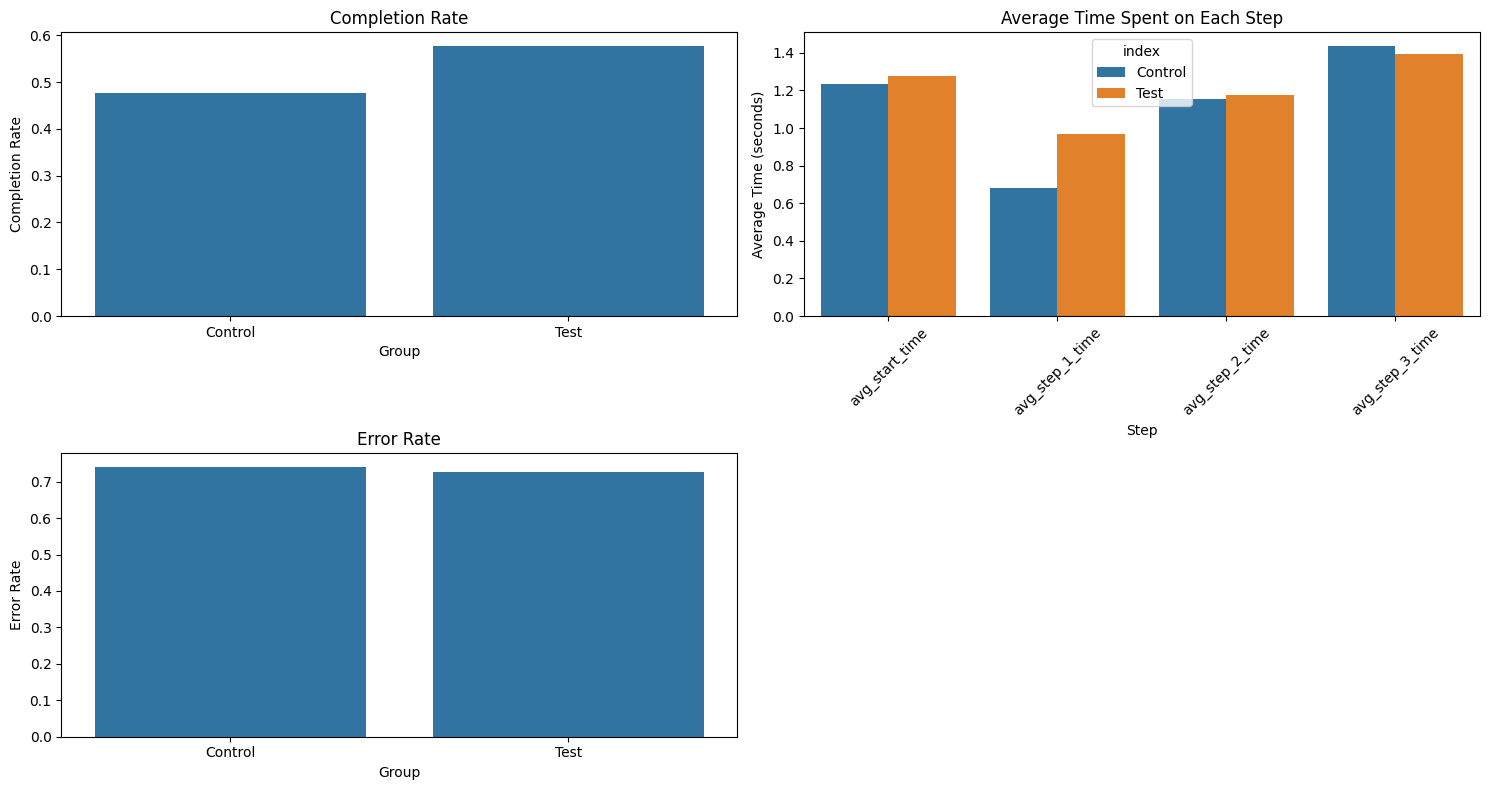

In [7]:

# Calculate KPIs
def calculate_kpis(df):
    kpis = {}

    # Completion Rate
    total_visits = df['visit_visitor_id'].nunique()
    completed_visits = df[df['last_step'] == 'confirm']['visit_visitor_id'].nunique()
    kpis['completion_rate'] = completed_visits / total_visits

    # Time Spent on Each Step
    kpis['avg_start_time'] = df['start_time'].mean()
    kpis['avg_step_1_time'] = df['step_1'].mean()
    kpis['avg_step_2_time'] = df['step_2'].mean()
    kpis['avg_step_3_time'] = df['step_3'].mean()

    # Error Rates
    errors = df[(df['step_1'] < df['start_time']) | (df['step_2'] < df['step_1']) | (df['step_3'] < df['step_2'])]
    kpis['error_rate'] = errors['visit_visitor_id'].nunique() / total_visits

    return kpis

kpis_control = calculate_kpis(df_control_final)
kpis_test = calculate_kpis(df_test_final)

print("Control Group KPIs:", kpis_control)
print("Test Group KPIs:", kpis_test)

# Convert KPIs to DataFrame for visualization
kpis_df = pd.DataFrame([kpis_control, kpis_test], index=['Control', 'Test']).reset_index()
kpis_df = kpis_df.melt(id_vars='index', var_name='KPI', value_name='Value')

# Visualization
plt.figure(figsize=(15, 8))

# Completion Rate
plt.subplot(2, 2, 1)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'completion_rate'], x='index', y='Value')
plt.title('Completion Rate')
plt.ylabel('Completion Rate')
plt.xlabel('Group')

# Average Time Spent on Each Step
plt.subplot(2, 2, 2)
sns.barplot(data=kpis_df[kpis_df['KPI'].str.contains('avg')], x='KPI', y='Value', hue='index')
plt.title('Average Time Spent on Each Step')
plt.ylabel('Average Time (seconds)')
plt.xlabel('Step')
plt.xticks(rotation=45)

# Error Rates
plt.subplot(2, 2, 3)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'error_rate'], x='index', y='Value')
plt.title('Error Rate')
plt.ylabel('Error Rate')
plt.xlabel('Group')

plt.tight_layout()
plt.show()


In [8]:
df_test_final.shape

(37190, 27)

In [9]:
df_control_final.shape

(32235, 27)

## 4. Hypothesis Testing

### 4.1. Completion Rate

Control Group KPIs: {'completion_rate': 0.47655448867344086, 'avg_start_time': 1.2343958430277648, 'avg_step_1_time': 0.679452458507833, 'avg_step_2_time': 1.1562566568429762, 'avg_step_3_time': 1.4371966289230131, 'error_rate': 0.7414312793263106}
Test Group KPIs: {'completion_rate': 0.5774203976078875, 'avg_start_time': 1.2760107555794566, 'avg_step_1_time': 0.9656211347136326, 'avg_step_2_time': 1.1773124495832212, 'avg_step_3_time': 1.393163484807744, 'error_rate': 0.7268196756640267}
Chi-Squared Test p-value: 4.620759680288328e-155


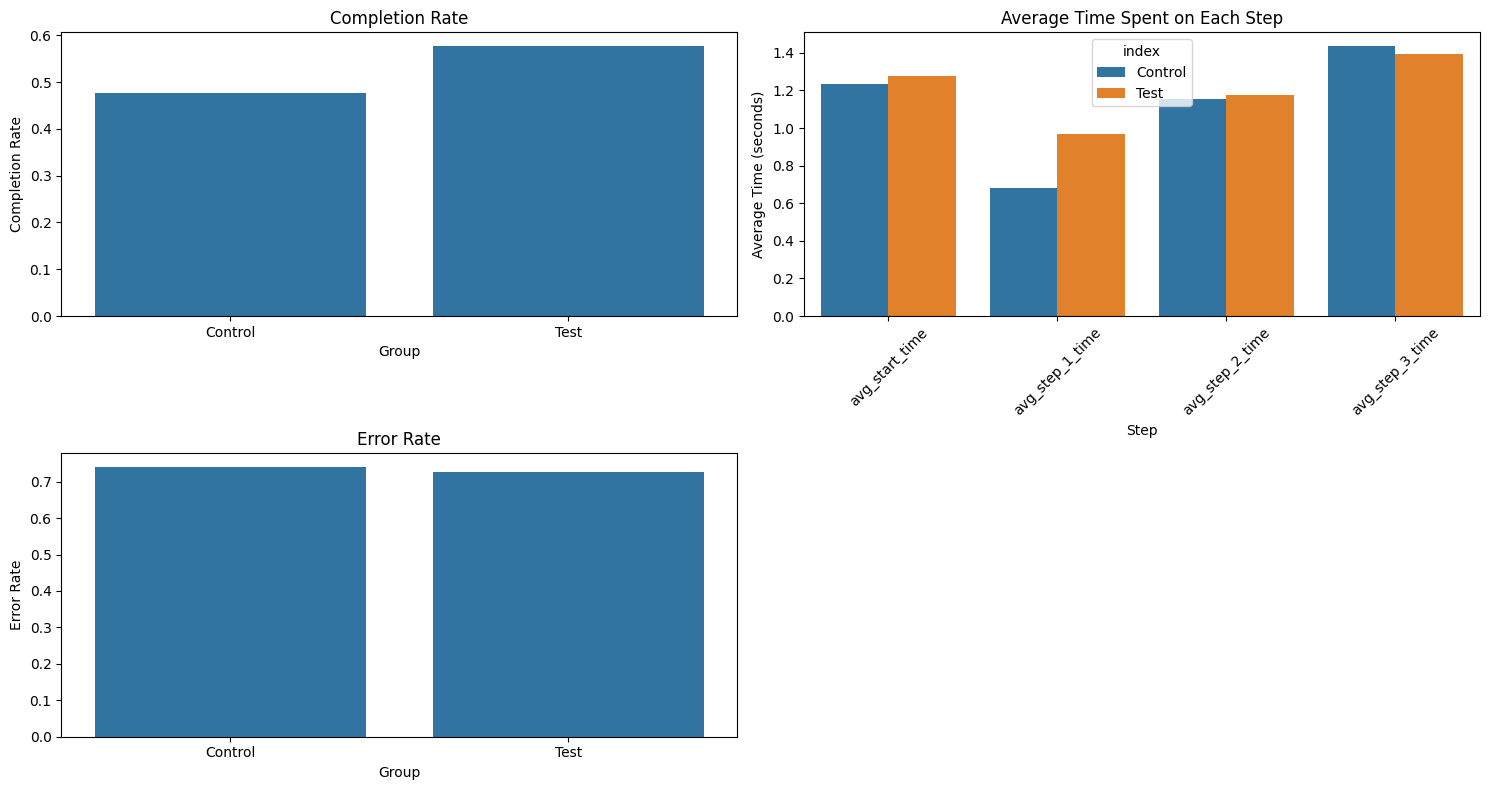

In [10]:

# Calculate KPIs
def calculate_kpis(df):
    kpis = {}
    total_visits = df['visit_visitor_id'].nunique()
    completed_visits = df[df['last_step'] == 'confirm']['visit_visitor_id'].nunique()
    
    # KPIs Calculation
    kpis['completion_rate'] = completed_visits / total_visits
    kpis['avg_start_time'] = df['start_time'].mean()
    kpis['avg_step_1_time'] = df['step_1'].mean()
    kpis['avg_step_2_time'] = df['step_2'].mean()
    kpis['avg_step_3_time'] = df['step_3'].mean()

    errors = df[(df['step_1'] < df['start_time']) | (df['step_2'] < df['step_1']) | (df['step_3'] < df['step_2'])]

    kpis['error_rate'] = errors['visit_visitor_id'].nunique() / total_visits
    
    return kpis, total_visits, completed_visits

kpis_control, total_visits_control, completed_visits_control = calculate_kpis(df_control_final)
kpis_test, total_visits_test, completed_visits_test = calculate_kpis(df_test_final)

print("Control Group KPIs:", kpis_control)
print("Test Group KPIs:", kpis_test)

# Chi-Squared Test for Completion Rate
contingency_table = pd.DataFrame({
    'Completed': [completed_visits_control, completed_visits_test],
    'Not Completed': [total_visits_control - completed_visits_control, total_visits_test - completed_visits_test]
}, index=['Control', 'Test'])

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-Squared Test p-value:", p)

# Convert KPIs to DataFrame for visualization
kpis_df = pd.DataFrame([kpis_control, kpis_test], index=['Control', 'Test']).reset_index()
kpis_df = kpis_df.melt(id_vars='index', var_name='KPI', value_name='Value')

# Visualization
plt.figure(figsize=(15, 8))

# Completion Rate
plt.subplot(2, 2, 1)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'completion_rate'], x='index', y='Value')
plt.title('Completion Rate')
plt.ylabel('Completion Rate')
plt.xlabel('Group')

# Average Time Spent on Each Step
plt.subplot(2, 2, 2)
sns.barplot(data=kpis_df[kpis_df['KPI'].str.contains('avg')], x='KPI', y='Value', hue='index')
plt.title('Average Time Spent on Each Step')
plt.ylabel('Average Time (seconds)')
plt.xlabel('Step')
plt.xticks(rotation=45)

# Error Rates
plt.subplot(2, 2, 3)
sns.barplot(data=kpis_df[kpis_df['KPI'] == 'error_rate'], x='index', y='Value')
plt.title('Error Rate')
plt.ylabel('Error Rate')
plt.xlabel('Group')

plt.tight_layout()
plt.show()


In [11]:
# df_control_final and df_control_test should be defined with the columns mentioned in the problem statement
# Calculate KPIs for control and test groups

kpis_control = calculate_kpis(df_control_final)
print("Control Group KPIs:", kpis_control)



Control Group KPIs: ({'completion_rate': 0.47655448867344086, 'avg_start_time': 1.2343958430277648, 'avg_step_1_time': 0.679452458507833, 'avg_step_2_time': 1.1562566568429762, 'avg_step_3_time': 1.4371966289230131, 'error_rate': 0.7414312793263106}, 32181, 15336)


In [12]:
kpis_test = calculate_kpis(df_test_final)
print("Test Group KPIs:", kpis_test)

Test Group KPIs: ({'completion_rate': 0.5774203976078875, 'avg_start_time': 1.2760107555794566, 'avg_step_1_time': 0.9656211347136326, 'avg_step_2_time': 1.1773124495832212, 'avg_step_3_time': 1.393163484807744, 'error_rate': 0.7268196756640267}, 37122, 21435)


### 4.2. Cost-Effectiveness Threshold

In [13]:
# Cost-Effectiveness Analysis
#completion_rate_increase = kpis_df.loc[kpis_df['KPI']=='Completion Rate', 'Test'].iloc[0] - kpis_df.loc[kpis_df['KPI']=='Completion Rate', 'Control'].iloc[0]
#3print("Completion Rate Increase:", completion_rate_increase)

# Check if the completion rate increase meets the cost-effectiveness threshold
#threshold = 0.05

#if completion_rate_increase >= threshold:
 #   print("The new design meets the cost-effectiveness threshold.")
#else:
#    print("The new design does not meet the cost-effectiveness threshold.")

### 4.3. Other Hypothesis Testing

In [14]:


# Average Age Hypothesis Test
t_stat_age, p_value_age = ttest_ind(df_control_final['clnt_age'], df_test_final['clnt_age'])
print("Average Age t-test p-value:", p_value_age)

# Client Tenure Hypothesis Test
t_stat_tenure, p_value_tenure = ttest_ind(df_control_final['clnt_tenure_yr'], df_test_final['clnt_tenure_yr'])
print("Client Tenure t-test p-value:", p_value_tenure)

# Gender Difference Hypothesis Test
gender_counts_control = df_control_final['gendr'].value_counts()
gender_counts_test = df_test_final['gendr'].value_counts()

# Create a contingency table
contingency_table = pd.DataFrame([gender_counts_control, gender_counts_test], index=['Control', 'Test'])

chi2, p, _, _ = chi2_contingency(contingency_table)
print("Gender Difference Chi-Squared Test p-value:", p)



Average Age t-test p-value: 0.20302959685301533
Client Tenure t-test p-value: 0.953681320670213
Gender Difference Chi-Squared Test p-value: 0.46320724931898294


## 5. Experiment Evaluation


Control Group Size: 32181
Test Group Size: 37122


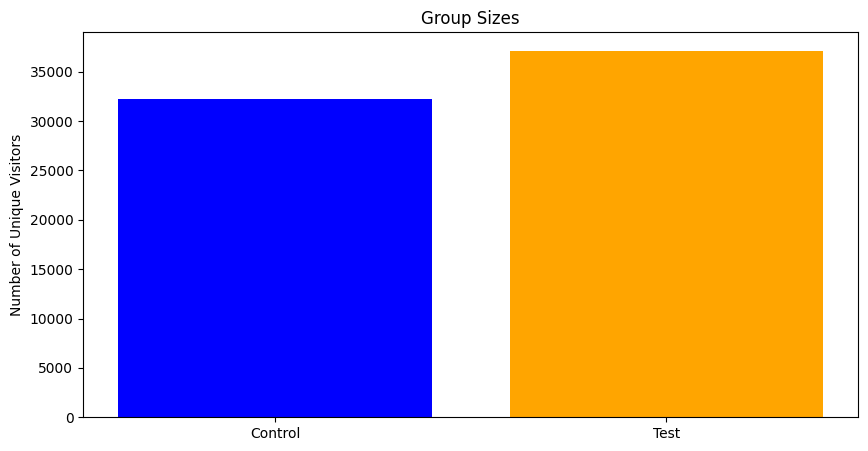

Gender Distribution Control:
 gendr
M        0.344160
Other    0.331906
F        0.323934
Name: proportion, dtype: float64
Gender Distribution Test:
 gendr
M        0.340441
Other    0.331648
F        0.327911
Name: proportion, dtype: float64


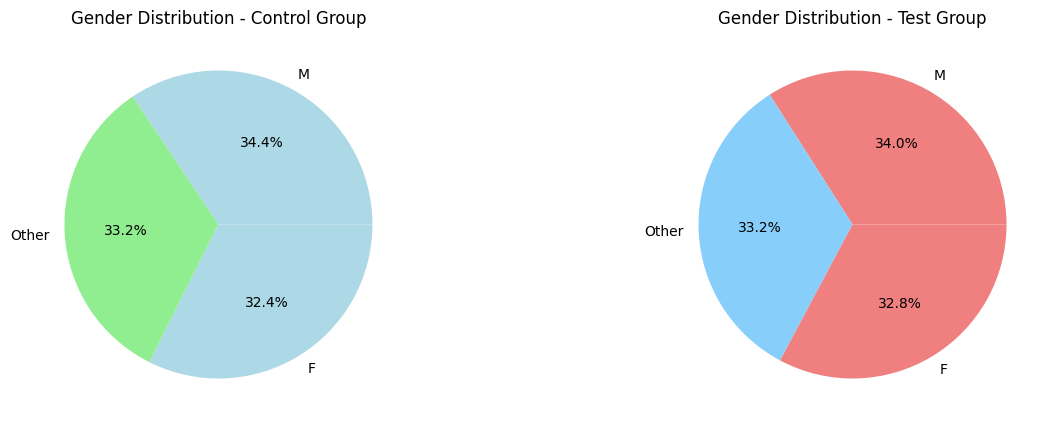

In [15]:


# Experiment Design Evaluation with Visualizations
def experiment_evaluation_with_visualizations(df_control, df_test):
    control_size = df_control['visit_visitor_id'].nunique()
    test_size = df_test['visit_visitor_id'].nunique()

    print("Control Group Size:", control_size)
    print("Test Group Size:", test_size)

    # Plot Group Sizes
    plt.figure(figsize=(10, 5))
    plt.bar(['Control', 'Test'], [control_size, test_size], color=['blue', 'orange'])
    plt.title('Group Sizes')
    plt.ylabel('Number of Unique Visitors')
    plt.show()

    # Gender Distribution
    gender_dist_control = df_control['gendr'].value_counts(normalize=True)
    gender_dist_test = df_test['gendr'].value_counts(normalize=True)

    print("Gender Distribution Control:\n", gender_dist_control)
    print("Gender Distribution Test:\n", gender_dist_test)

    # Plot Gender Distribution
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].pie(gender_dist_control, labels=gender_dist_control.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
    axs[0].set_title('Gender Distribution - Control Group')

    axs[1].pie(gender_dist_test, labels=gender_dist_test.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
    axs[1].set_title('Gender Distribution - Test Group')

    plt.show()

experiment_evaluation_with_visualizations(df_control_final, df_test_final)


In [16]:
# Additional Data Needs
print("Additional data that could enhance the analysis:")
print("- Detailed logs of user interactions (e.g., clicks, hovers)")
print("- Feedback or survey data on user satisfaction")
print("- Data on external factors that could influence user behavior (e.g., marketing campaigns)")


Additional data that could enhance the analysis:
- Detailed logs of user interactions (e.g., clicks, hovers)
- Feedback or survey data on user satisfaction
- Data on external factors that could influence user behavior (e.g., marketing campaigns)
